In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
#Read data files
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
sample_submission = pd.read_csv('../data/sample_submission_kaggle.csv')
extra_infos = pd.read_json('../data/extra_infos.json',lines=True)

In [44]:
# for context in test['context_type'].unique():
#     print(context)
#     print(len(train[train['context_type'] == context]))
    
    
count_per_context_test = test.groupby(['context_type'])['media_id'].count()
print(count_per_context_test)

1
1617653
5
167428
20
17489
23
13168


# Looking at the influence of the context: data exploration

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


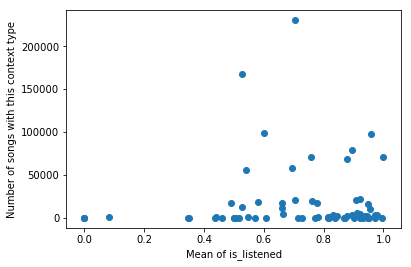

context_type
0     3198365
1     1617653
2     1052844
3      433456
4      230259
5      167428
6       98523
7       97645
8       79330
9       71572
10      71026
11      68775
12      58460
13      55830
14      21641
15      20826
16      20725
17      20075
18      18933
19      17973
20      17489
21      16918
22      16625
23      13168
24      11200
25      10206
26       6158
27       5017
28       4256
29       3739
       ...   
44        658
45        593
46        510
47        474
48        375
49        278
50        278
51        265
52        206
53        162
54        153
55        147
56        127
57        118
58        112
59        100
60         98
61         92
62         91
63         72
64         35
65         33
66         27
67          7
68          7
69          3
70          2
71          2
72          2
73          1
Name: media_id, dtype: int64


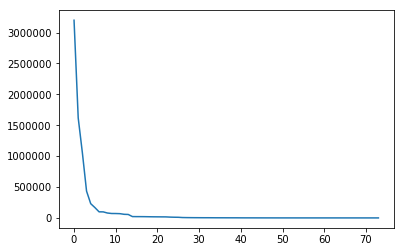

In [43]:
#Train set

print(sorted(train['context_type'].unique()))
avg_per_context = train.groupby(['context_type'])['is_listened'].mean()
count_per_context = train.groupby(['context_type'])['media_id'].count()
# print(avg_per_context)

plt.scatter(avg_per_context[4:],count_per_context[4:])
plt.xlabel('Mean of is_listened')
plt.ylabel('Number of songs with this context type')
plt.show()

# plt.hist2d(avg_per_context,count_per_context, bins=50, cmap = plt.cm.gist_ncar)#colormaps:  plt.cm.jet, plt.cm.nipy_spectral
# plt.xlabel('Mean of is_listened')
# plt.ylabel('Number of songs that the user listened to')
# plt.title('Density')
# plt.colorbar()
# plt.show()


print(count_per_context)

plt.plot(count_per_context)
plt.show()

The context_type is, for the train set, a number from 0 to 73 (both included) without interruption

In [7]:
#Test set

print(sorted(test['context_type'].unique()))
count_per_context_test = test.groupby(['context_type'])['media_id'].count()
print(count_per_context_test)

[1, 5, 20, 23]
context_type
1     16167
5      3312
20      251
23      188
Name: media_id, dtype: int64


In [9]:
print(count_per_context_test * 100 / count_per_context_test.sum())

context_type
1     81.167788
5     16.628176
20     1.260167
23     0.943870
Name: media_id, dtype: float64


In [10]:
print(count_per_context * 100 / count_per_context.sum())

context_type
0     42.312941
1     21.400827
2     13.928656
3      5.734429
4      3.046224
5      2.214998
6      1.303415
7      1.291800
8      1.049500
9      0.946866
10     0.939642
11     0.909863
12     0.773400
13     0.738606
14     0.286301
15     0.275519
16     0.274182
17     0.265583
18     0.250475
19     0.237775
20     0.231372
21     0.223818
22     0.219941
23     0.174207
24     0.148171
25     0.135021
26     0.081468
27     0.066373
28     0.056305
29     0.049465
        ...    
44     0.008705
45     0.007845
46     0.006747
47     0.006271
48     0.004961
49     0.003678
50     0.003678
51     0.003506
52     0.002725
53     0.002143
54     0.002024
55     0.001945
56     0.001680
57     0.001561
58     0.001482
59     0.001323
60     0.001296
61     0.001217
62     0.001204
63     0.000953
64     0.000463
65     0.000437
66     0.000357
67     0.000093
68     0.000093
69     0.000040
70     0.000026
71     0.000026
72     0.000026
73     0.000013
Name: media

The context_type is, for the test set, a number among 1,5,20 or 23.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 17, 18, 20, 22, 23, 24, 28, 29, 30, 37, 38, 40, 43, 46, 47, 48, 49, 51, 52, 53, 55, 61, 63, 69]


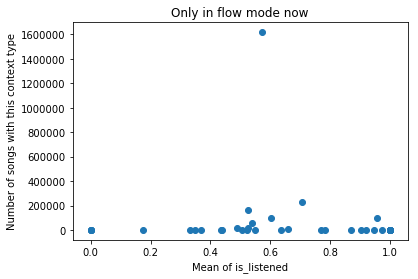

In [21]:
#Which contexts in Flow mode?
train_flow = train[train['listen_type'] == 1]
print(sorted(train_flow['context_type'].unique()))

avg_per_context_flow = train_flow.groupby(['context_type'])['is_listened'].mean()
count_per_context_flow = train_flow.groupby(['context_type'])['media_id'].count()

plt.scatter(avg_per_context_flow,count_per_context_flow)
plt.xlabel('Mean of is_listened')
plt.ylabel('Number of songs with this context type')
plt.title('Only in flow mode now')
plt.show()

The context_type is, for the train set with FLOW MODE only, is a list that included the ones of the test set, but also a lot of others...

In [16]:
list_times_max = []
list_times_min = []
for context in sorted(train['context_type'].unique()):
#     print(context)
    train_context_times = train[train['context_type'] == context]['ts_listen']
#     print(train_context_times.min(), train_context_times.max(), train_context_times.median() )
    list_times_max.append(train_context_times.max())
    list_times_min.append(train_context_times.min())

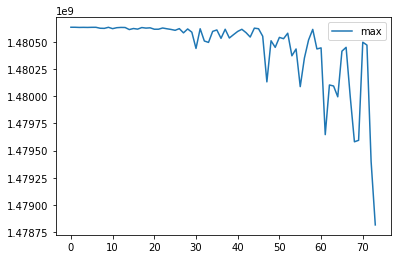

In [19]:
plt.plot(list_times_max,label='max')
# plt.plot(list_times_min,label='min')
plt.legend()
plt.show()

In [45]:
#We need to group some context_types together, based on their frequency

train.loc[train['context_type'] >= 26, 'context_type'] = 26 #grouping all context_type with less than 10000 rows

In [46]:
print(sorted(train['context_type'].unique()))
avg_per_context = train.groupby(['context_type'])['is_listened'].mean()
count_per_context = train.groupby(['context_type'])['media_id'].count()
print(count_per_context)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]
context_type
0     3198365
1     1617653
2     1052844
3      433456
4      230259
5      167428
6       98523
7       97645
8       79330
9       71572
10      71026
11      68775
12      58460
13      55830
14      21641
15      20826
16      20725
17      20075
18      18933
19      17973
20      17489
21      16918
22      16625
23      13168
24      11200
25      10206
26      51889
Name: media_id, dtype: int64
